In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import os
# from bokeh.plotting import figure, show, output_notebook 


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# filename = "/home/jude/Workspace/SECDA-TFLite_v1.2/tensorflow/.data/mm2im_int.csv"
# filename = "/home/jude/Workspace/SECDA-TFLite_v1.2/tensorflow/.data/mm2im_profs/
folder = "/home/jude/Workspace/SECDA-TFLite_v1.2/tensorflow/.data/mm2im_profs/"
for profs in os.listdir(folder):
    print(profs)
# # read csv file in pandas dataframe
# df = pd.read_csv(filename , sep=',', header=0)
# display(df)

mm2im2024-4-15-3-30-46.csv
mm2im_1.csv


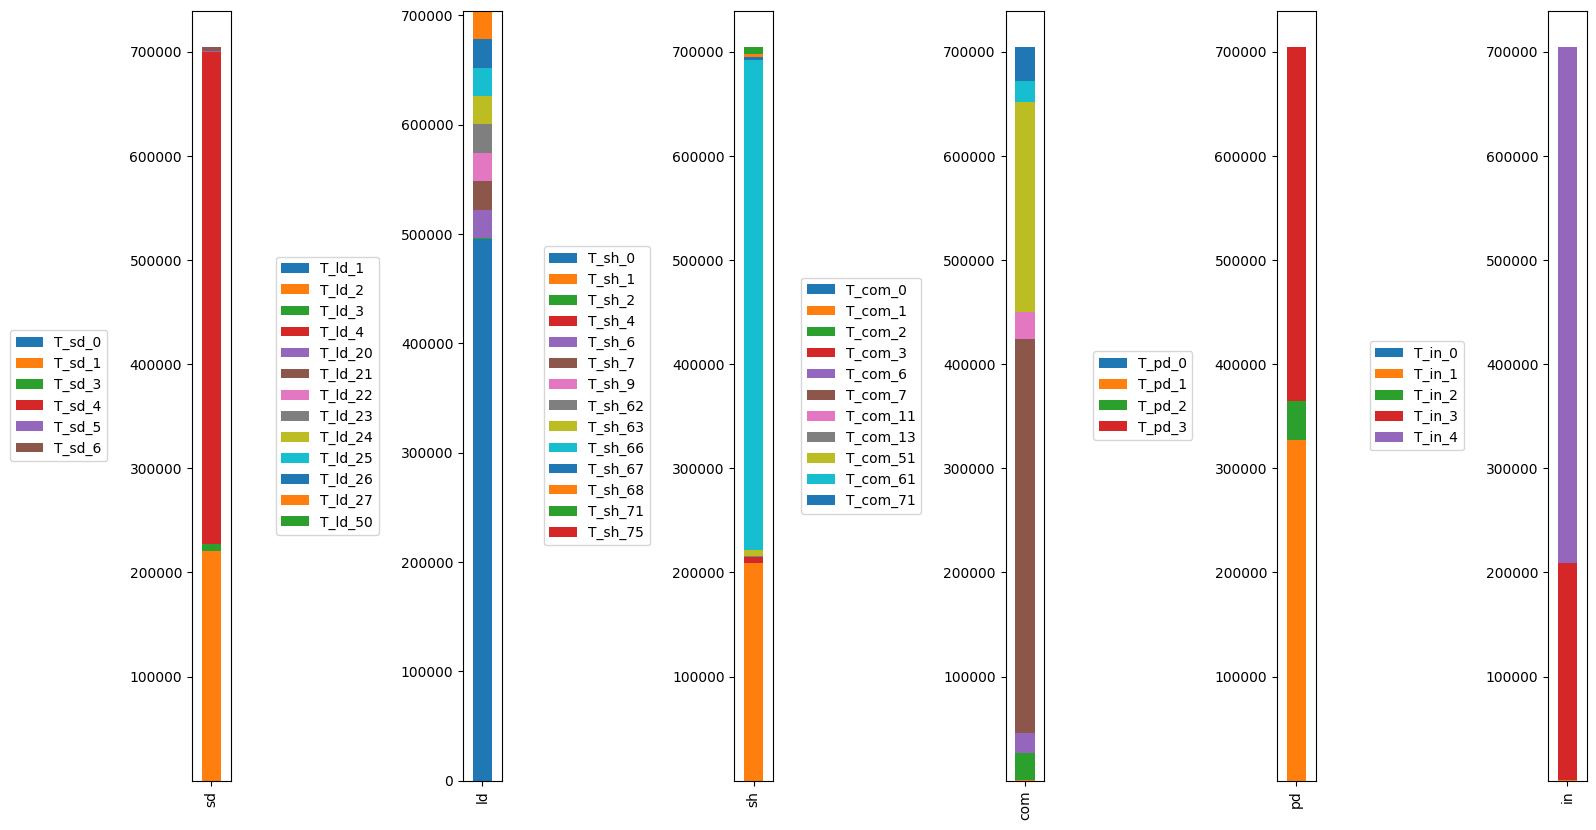

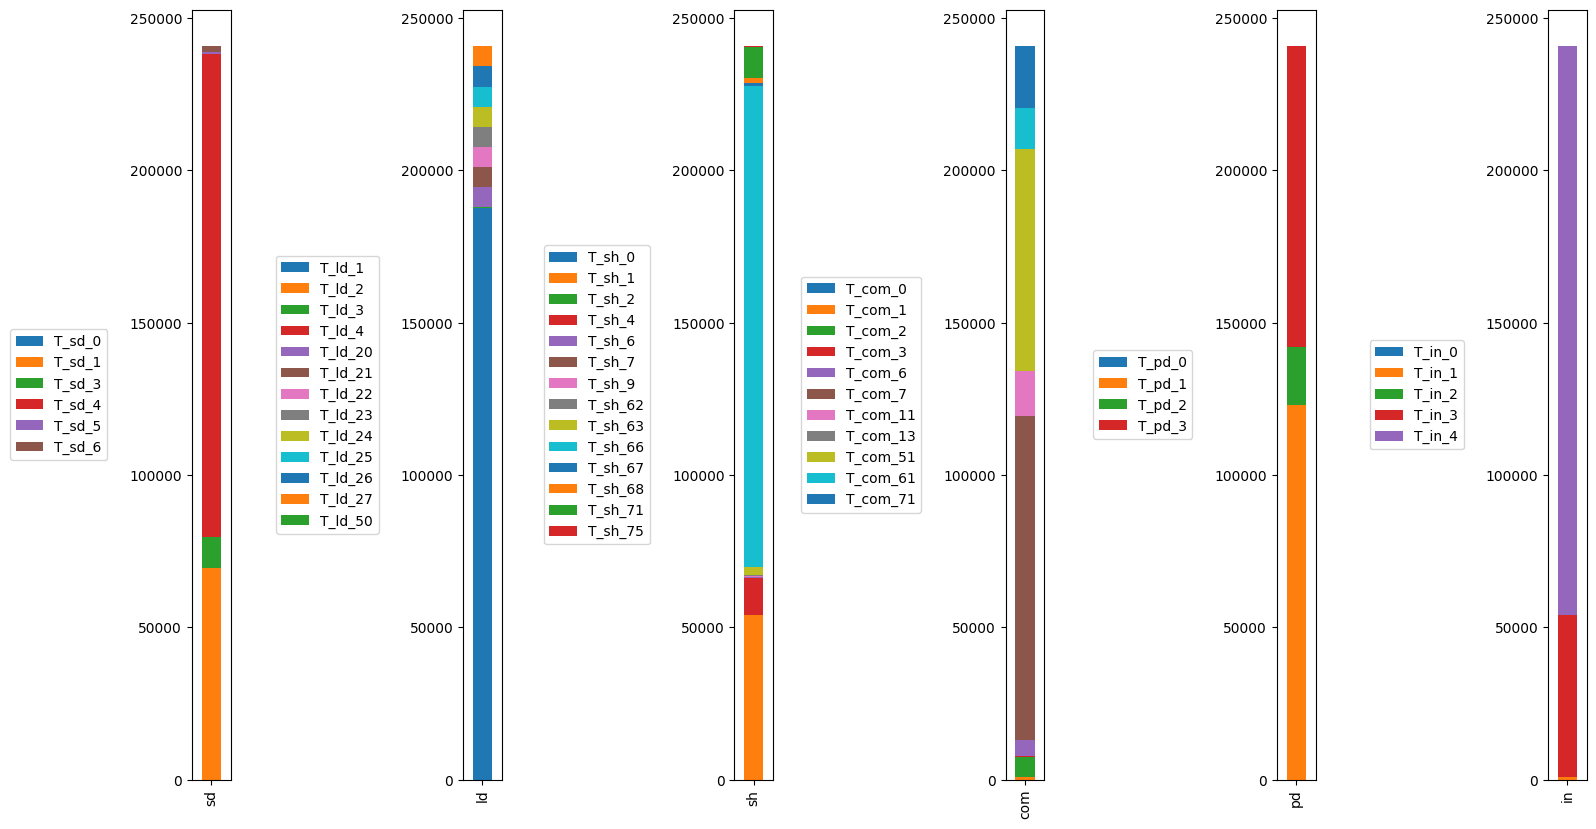

In [16]:
filename = folder + "mm2im2024-4-15-3-30-46.csv"
df = pd.read_csv(filename, sep=",", header=0)
# loop through each row in the dataframe
for index, row in df.iterrows():
    # drop column "cycles" from the row
    # row = row.drop(['cycles'])
    # drop every column expect "cycles" from the dataframe
    # cols = ["cycles", "idle1", "load_inps", "load_wgts", "gemm1", "post1", "compute"]
    cols = ["cycles", "idle1", "load_inps", "load_wgts", "gemm1", "post1", "compute"]

    for col in df.columns:
        if not col.startswith("T_"):
            row = row.drop([col])

    T_rows = [row.split("_")[1] for row in df.columns if row.startswith("T_")]
    T_rows = list(set(T_rows))
    # empty df
    sdf = pd.DataFrame()
    Tlen = T_rows.__len__()
    fig, axs = plt.subplots(1 , Tlen, figsize=(Tlen*3, 10))
    for id, T_row in enumerate(T_rows):
        all_T_row_cols = [row for row in df.columns if row.startswith("T_" + T_row)]
        # create new df all_T_row_cols  as columns and T_row as  index
        ndf = df[all_T_row_cols]  # only first row
        ndf = ndf.iloc[index]
        # set index as T_row
        ndf = ndf.rename(T_row)


        pd.DataFrame(ndf).T.plot(kind='bar', stacked=True, ax=axs[id])
        axs[id].legend(loc='center right', bbox_to_anchor=(-2, 0.5),prop={'size': 10},ncol=1)

    
    plt.subplots_adjust(wspace=Tlen, hspace=10)
    plt.show()


    # # create a figure and axis
    # fig, ax = plt.subplots()
    # # increase figure size
    # fig.set_size_inches(18.5, 10.5)
    # # set the title
    # # create bar chart with the row data
    # ax.bar(row.index, row)
    # # set the x-axis tick marks to the column names
    # ax.xaxis.set_major_locator(ticker.FixedLocator(range(len(row.index))))
    # ax.xaxis.set_major_formatter(ticker.FixedFormatter(row.index))
    # # rotate the x-axis labels
    # plt.setp(ax.get_xticklabels(), rotation=90)
    # # set the y-axis label
    # ax.set_ylabel("Cycles")
    # # set the title
    # ax.set_title(row.name)
    # # show the plot
    # plt.show()
    # # print idle1 / compute

    # break